<a href="https://colab.research.google.com/github/DeepikaTyagi26/Almabetter-Projects-/blob/project1/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Checklist and Approach**

**1. Problem Statement**

**Objective:** Discover key factors responsible for app engagement and success by analyzing Play Store app data.

**Goal:** Identify actionable insights for developers to optimize their apps and capture a larger share of the Android market.

**2. Business Context**

The success of an app in the Play Store can be driven by several factors including category, rating, size, reviews, and pricing. Understanding these factors can help developers make data-driven decisions to enhance their app’s performance and user engagement.

## **1. Set Up Your Environment**

In [ ]:

!pip install gdown

# **2. Load the Data**

In [ ]:
import pandas as pd
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import gdown

# Provide the file ID
review_file_id = '1zJmyrNtkv_ZnVAY1wtg1irTRbpoZ9rRH'
app_file_id = '1pVZNhpwbqbu3xLf6J-1KrQI_-B8KqDCt'

# Provide the direct download link
url1 = 'https://drive.google.com/uc?id=' + review_file_id
url2 = 'https://drive.google.com/uc?id=' + app_file_id

# Download the file
Review_output = 'Review_data.csv'
App_output = 'App_data.csv'
gdown.download(url1, Review_output, quiet=False)
gdown.download(url2, App_output, quiet=False)

Review_df = pd.read_csv('Review_data.csv')
apps_df = pd.read_csv('App_data.csv')

# Display the content of the CSV file
print(Review_df)
print(apps_df)


Downloading...
From: https://drive.google.com/uc?id=1zJmyrNtkv_ZnVAY1wtg1irTRbpoZ9rRH
To: /content/Review_data.csv
100%|██████████| 7.67M/7.67M [00:00<00:00, 46.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pVZNhpwbqbu3xLf6J-1KrQI_-B8KqDCt
To: /content/App_data.csv
100%|██████████| 1.36M/1.36M [00:00<00:00, 12.3MB/s]


                               App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290                                                

# **3. Data Cleaning**

In [ ]:
# Investigate missing values
print(apps_df.isnull().sum())

# Fill missing values or drop them if needed
apps_df.dropna(subset=['Rating', 'Size'], inplace=True)

# Convert 'Size' to string, clean, and convert to numeric
apps_df['Size'] = apps_df['Size'].astype(str).str.replace('[^\d\.]', '', regex=True)
apps_df['Size'] = pd.to_numeric(apps_df['Size'], errors='coerce')

# Inspect any remaining non-numeric values after cleaning
print(apps_df[pd.to_numeric(apps_df['Size'], errors='coerce').isnull()]['Size'])

# Remove outliers based on size
apps_df = apps_df[apps_df['Size'] < 100]  # Assuming size in MB

# Convert 'Installs' to numeric
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace('[^\d]', '', regex=True).astype(int)

# Convert 'Price' to numeric
apps_df['Price'] = apps_df['Price'].astype(str).str.replace('[^\d.]', '', regex=True).astype(float)



App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64
Series([], Name: Size, dtype: float64)


# **Descriptive Statistics with Pandas**

In [ ]:
# Summary statistics
print(apps_df[['Rating', 'Size', 'Installs']].describe())

# Group by category
category_stats = apps_df.groupby('Category').agg({'Rating': 'mean', 'Size': 'mean', 'Installs': 'mean'})
print(category_stats)

            Rating         Size      Installs
count  7499.000000  7499.000000  7.499000e+03
mean      4.178690    23.717696  8.608911e+06
std       0.544011    23.308866  5.084691e+07
min       1.000000     1.000000  1.000000e+00
25%       4.000000     5.900000  1.000000e+04
50%       4.300000    15.000000  1.000000e+05
75%       4.500000    34.000000  1.000000e+06
max       5.000000    99.000000  1.000000e+09
                       Rating       Size      Installs
Category                                              
ART_AND_DESIGN       4.361017  12.766102  1.681917e+06
AUTO_AND_VEHICLES    4.150000  21.885484  7.043516e+05
BEAUTY               4.291892  15.513514  3.626000e+05
BOOKS_AND_REFERENCE  4.313380  15.234507  9.843814e+05
BUSINESS             4.128099  15.811983  2.214099e+06
COMICS               4.136170  13.695745  3.699170e+05
COMMUNICATION        4.104687  15.236979  2.566469e+07
DATING               3.957803  18.312717  8.200295e+05
EDUCATION            4.391667  21.13

# **Data Visualization with Matplotlib and Seaborn**

**Distribution of App Ratings: Histogram of app ratings.**

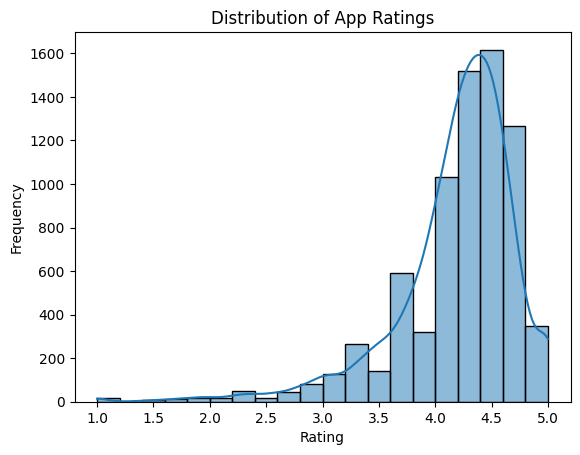

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(apps_df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## **Installs vs. Price: Scatter plot showing the relationship between installs and price.**

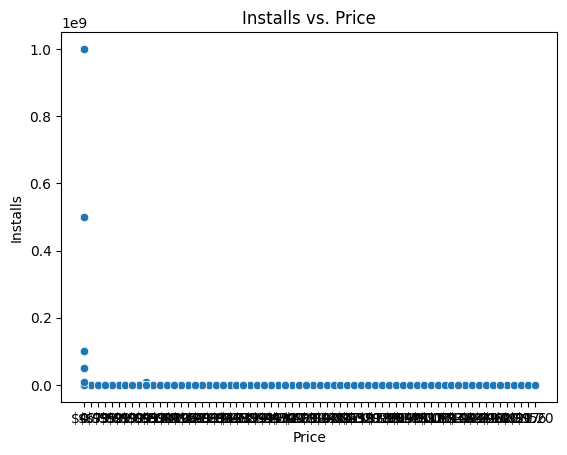

In [ ]:
sns.scatterplot(x='Price', y='Installs', data=apps_df)
plt.title('Installs vs. Price')
plt.xlabel('Price')
plt.ylabel('Installs')
plt.show()

## **Heatmap of Correlation Matrix:**

Text(0.5, 1.0, 'Correlation Heatmap')

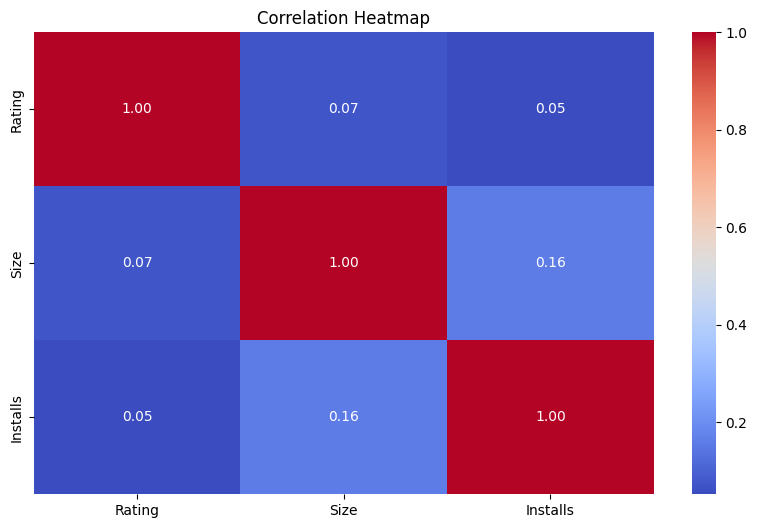

In [ ]:
plt.figure(figsize=(10, 6))
corr_matrix = apps_df[['Rating', 'Size', 'Installs']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

## **Category-wise Average Rating: Bar plot of average ratings by app category.**

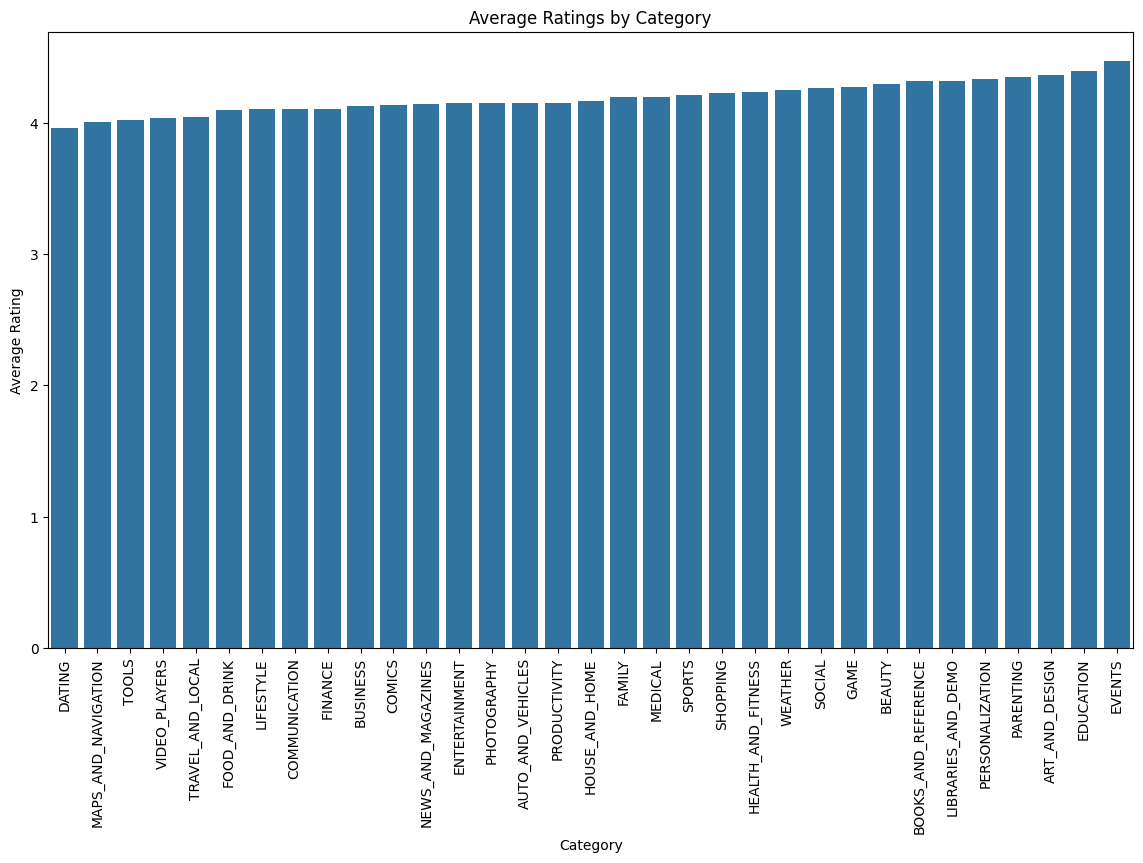

In [ ]:
plt.figure(figsize=(14, 8))
category_avg_ratings = apps_df.groupby('Category')['Rating'].mean().sort_values()
sns.barplot(x=category_avg_ratings.index, y=category_avg_ratings.values)
plt.xticks(rotation=90)
plt.title('Average Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

## **Advanced Analysis with NumPy and Pandas**

**Correlation Analysis:**

In [ ]:
import numpy as np

# Calculate correlations
ratings_size_corr = np.corrcoef(apps_df['Rating'], apps_df['Size'])[0, 1]
print(f'Correlation between Rating and Size: {ratings_size_corr:.2f}')

Correlation between Rating and Size: 0.07


**Predictive Modeling Preparation:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare data for modeling
features = apps_df[['Size', 'Installs']]
target = apps_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a simple model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
print(f'Model Score: {model.score(X_test, y_test):.2f}')

Model Score: -0.00


**Analyze Features Affecting Ratings:**

In [ ]:
# Feature importance using correlation
feature_importance = apps_df[['Rating', 'Size', 'Installs']].corr()
print(feature_importance)

            Rating      Size  Installs
Rating    1.000000  0.072673  0.051597
Size      0.072673  1.000000  0.157853
Installs  0.051597  0.157853  1.000000


## **Data Cleaning for Reviews**

In [ ]:
# Drop rows with missing values in the 'review' column
Review_df = Review_df.dropna(subset=['Translated_Review'])

# Convert 'review' column to string
Review_df['Translated_Review'] = Review_df['Translated_Review'].astype(str)

# Reset index
Review_df = Review_df.reset_index(drop=True)


<ipython-input-6-861c43272e8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Review_df['Translated_Review'] = Review_df['Translated_Review'].astype(str)


## **Sentiment Analysis**

In [ ]:
from textblob import TextBlob

# Define a function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'review' column
Review_df['Sentiment'] = Review_df['Translated_Review'].apply(get_sentiment)

# Define sentiment categories based on polarity
def sentiment_category(Sentiment_Polarity):
    if Sentiment_Polarity > 0:
        return 'Positive'
    elif Sentiment_Polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

Review_df['sentiment_category'] = Review_df['Sentiment'].apply(sentiment_category)

# Display the sentiment distribution
print(Review_df['sentiment_category'].value_counts())

sentiment_category
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64


## **Visualize the distribution of sentiments and other relevant statistics.**

<ipython-input-28-e25dcf58b3e6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=Review_df, palette='viridis')


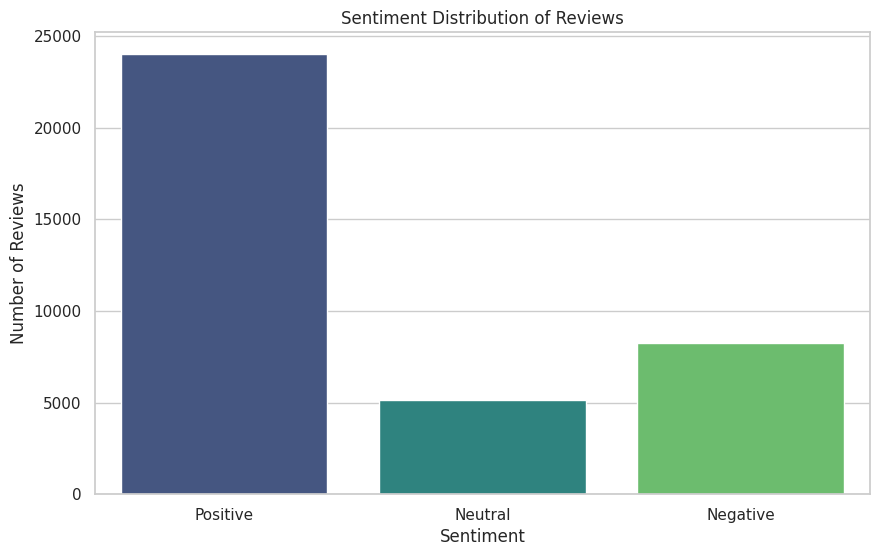

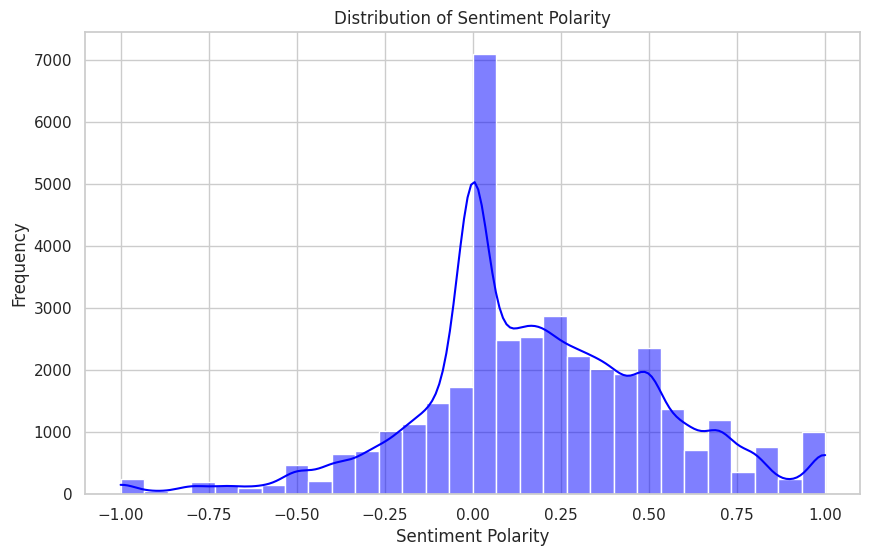

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=Review_df, palette='viridis')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Plot sentiment polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(Review_df['Sentiment'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()
